<ins><b>Neural Network & Deep Learning : Experiment No. 1</b></ins>


<ins><b>Lab - 1 :</b></ins> Implementation of Perceptron from scratch

# Key components of the Lab Experiment

1. Reading the dataset
2. Exploratory Data Analsis
3. Pre-processing
4. Test-Train Split
5. Implementation of the Perceptron
6. Tuning the number of epochs
7. Final Model
8. References

# Importing the required modules

In [259]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for encoding the categorical variables.
from sklearn.preprocessing import OneHotEncoder

# Reading the dataset

In [260]:
df = pd.read_csv("/content/breast-cancer.csv")

In [261]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

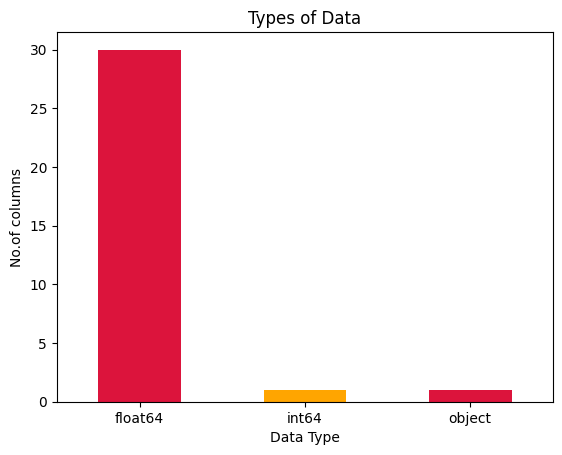

In [263]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

The dataset has mainly numeric variables and very
ew categorical variables.

# Exploratory Data Analysis

In Exploratory Data Analysis the following parts are included:
1. Seggragation of columns (into categorical and numerical)
2. Analysis of Missing Values
3. Target Variable Class Distribution

## Seggregating columns

The columns with data type as Object are considered as categorical while others are considered as numerical.

In [264]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

Since, the UCI data repository mentions missing values as "?" instead of null values the analysis has to be carried out accordingly.

In [265]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

Only 2% of the rows have null values and hence the rows can be dropped directly instead of applying any imputation techniques.

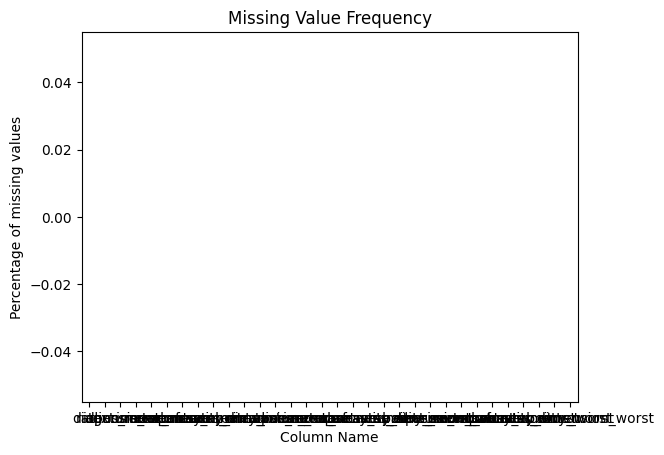

In [266]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

## Target Variable Analysis

The dataset is Fully biased towards "0.0" class since has significantly more entries.

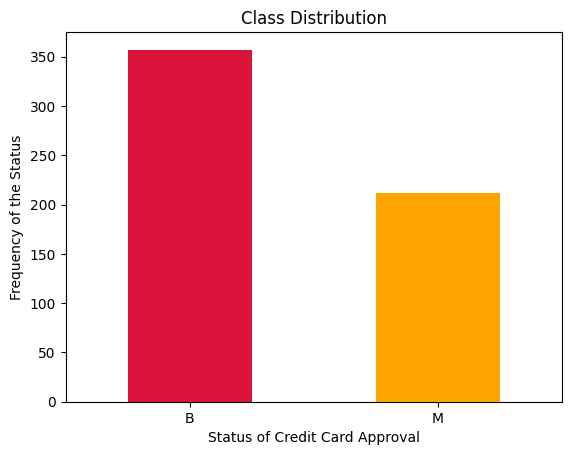

In [267]:
df['diagnosis'].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

# Pre-processing

## Handling Missing Values

In [268]:
df = df.replace({"?":None})

In [269]:
df = df.dropna()

## Encoding the columns

In [270]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [271]:
df = df.reset_index()

# Test Train Split

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df['diagnosis'],
    test_size = 0.3,
    train_size=0.7,
    random_state = 0
)
X_train.pop('diagnosis')
X_test.pop('diagnosis')

512    0.0
457    1.0
439    1.0
298    1.0
37     1.0
      ... 
7      0.0
408    0.0
523    1.0
361    1.0
553    1.0
Name: diagnosis, Length: 171, dtype: float64

In [273]:
X_train

,index,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
478,478,911685,0.0,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,...,0.003614,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941
303,303,892657,0.0,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,...,0.003317,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213
155,155,8711003,0.0,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,...,0.002484,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113
186,186,874217,1.0,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,...,0.001087,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206
101,101,862722,0.0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,...,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,277,8911670,1.0,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,...,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567
9,9,84501001,1.0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366
359,359,901034301,0.0,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,...,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454
192,192,875099,0.0,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,...,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909


# Perceptron

In [274]:
class Perceptron:

    # Initialising the required parameters for the perceptron.
    def __init__(self, X, y, learning_rate, epochs : int):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Activation function.
    def __activation_function(self,x):
        return 1.0 if (x > 0) else 0.0

    # The model training or fitting by updating weights.
    def fit(self):
        n_rows,n_cols = self.X.shape
        self.weights = np.zeros((n_cols + 1, 1))
        for epoch in range(self.epochs):
            for index, features in enumerate(self.X.values):
                feature_transposed = np.insert(features, 0, 1).reshape(-1,1)
                predicted_target = self.__activation_function(np.dot(feature_transposed.T, self.weights))
                flag = np.squeeze(predicted_target) - self.y[index]
                if flag != 0:
                    self.weights += self.learning_rate*((self.y[index] - predicted_target)*feature_transposed)

    # Predicting on a single instance.
    def predict(self, X_test):
        return self.__activation_function(np.dot(p.weights.reshape(1,-1)[0],X_test))

    # Predicting on a larger number of instances and returning accuracy.
    def test(self, test_data, y):
        x = []
        for i in range(len(test_data.values)):
            X_test = np.array(test_data.iloc[i])
            x.append(p.predict(np.insert(X_test,0,1)) == p.y[i])
        return sum(x)*100/len(test_data)

# Initialising the Perceptron Parameters

In [275]:
y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
p = Perceptron(X, y, 0.5, 50)

# Fitting the model

In [276]:
p.fit()

# Test Accuracy

In [277]:
p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1)))

array([64.9122807])

# Train Accuracy

In [278]:
p.test(X,y)

array([62.56281407])

# Tuning the number of epochs

In [279]:
train_acc = []
test_acc = []
epochs = []

for i in range(20,200,20):
    y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
    X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
    p = Perceptron(X, y, 0.5, i)
    p.fit()
    train_acc.append(p.test(X,y))
    test_acc.append(p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1))))
    epochs.append(i)

# Train-Test Accuracies across different epochs

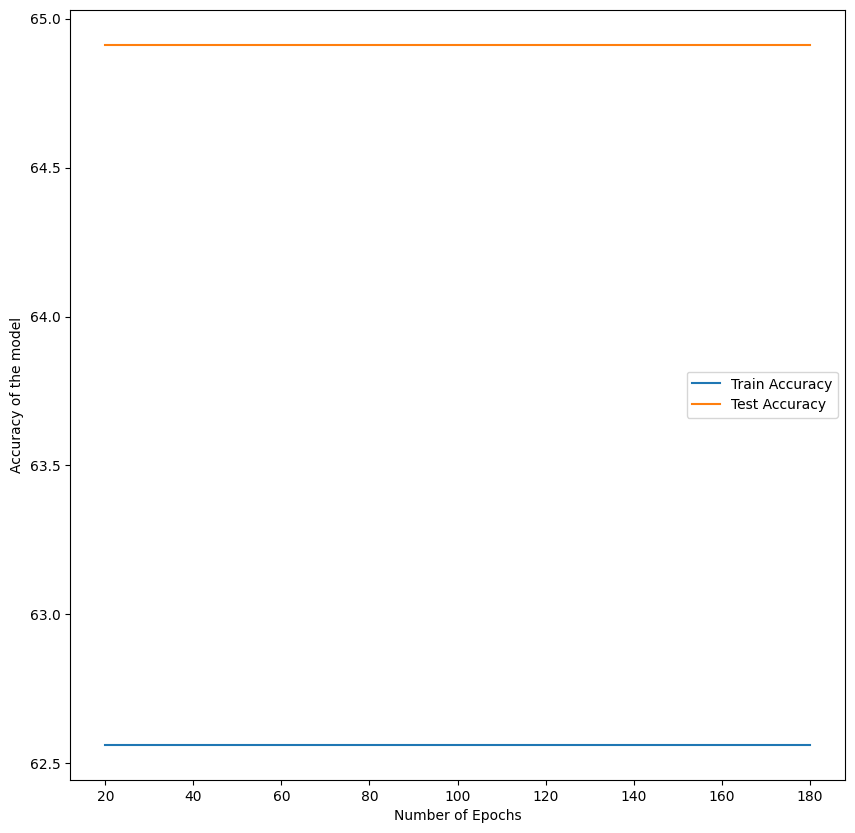

In [280]:
plt.figure(figsize=(10,10))
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.legend(['Train Accuracy',"Test Accuracy"])
plt.show()

# Final Model

In [281]:
tuning = pd.DataFrame({"epochs":np.array(epochs).squeeze(),"train accuracy":np.array(train_acc).squeeze(), "test accuracy":np.array(test_acc).squeeze()})

In [282]:
def diff(row):
    return row[1] - row[2]

In [283]:
tuning["Difference"] = tuning.apply(diff,axis=1)

In [284]:
tuning.sort_values(by="Difference")

,epochs,train accuracy,test accuracy,Difference
0,20,62.562814,64.912281,-2.349467
1,40,62.562814,64.912281,-2.349467
2,60,62.562814,64.912281,-2.349467
3,80,62.562814,64.912281,-2.349467
4,100,62.562814,64.912281,-2.349467
5,120,62.562814,64.912281,-2.349467
6,140,62.562814,64.912281,-2.349467
7,160,62.562814,64.912281,-2.349467
8,180,62.562814,64.912281,-2.349467


The best model is the one which is trained for 40 epochs. There can be many other hyperparameters but since Perceptron is coded from scratch those cannot be incorporated. The one with 80 epoches is not considered since the train accuracy must be greater than the test accuracy because the model is trained on the former.

Apply the perceptron to anyone of the dataset from the following link.

https://www.kaggle.com/datasets?tags=14201-Binary+Classification

Prepare the Part B and upload.

# References

About Perceptron : https://analyticsindiamag.com/perceptron-is-the-only-neural-network-without-any-hidden-layer/

For Perceptron from scratch : https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

Dataset : https://archive.ics.uci.edu/ml/datasets/credit+approval